In [ ]:
from sympy import symbols, Matrix

In [ ]:
x1, x2, x3 = symbols('x1 x2 x3')

In [ ]:
w11, w12, w13, w21, w22, w23 = symbols('w11 w12 w13 w21 w22 w23')

In [ ]:
x = Matrix([x1, x2, x3])

In [ ]:
x

Matrix([
[x1],
[x2],
[x3]])

In [ ]:
W = Matrix([[w11, w12, w13], [w21, w22, w23]])

In [ ]:
W

Matrix([
[w11, w12, w13],
[w21, w22, w23]])

In [ ]:
H = W @ x

In [ ]:
H

Matrix([
[w11*x1 + w12*x2 + w13*x3],
[w21*x1 + w22*x2 + w23*x3]])

In [ ]:
W.transpose() @ W

Matrix([
[  w11**2 + w21**2, w11*w12 + w21*w22, w11*w13 + w21*w23],
[w11*w12 + w21*w22,   w12**2 + w22**2, w12*w13 + w22*w23],
[w11*w13 + w21*w23, w12*w13 + w22*w23,   w13**2 + w23**2]])

In [ ]:
from sympy import simplify

In [ ]:
(W.transpose() @ H).applyfunc(simplify)

Matrix([
[w11*(w11*x1 + w12*x2 + w13*x3) + w21*(w21*x1 + w22*x2 + w23*x3)],
[w12*(w11*x1 + w12*x2 + w13*x3) + w22*(w21*x1 + w22*x2 + w23*x3)],
[w13*(w11*x1 + w12*x2 + w13*x3) + w23*(w21*x1 + w22*x2 + w23*x3)]])

In [ ]:
W.transpose() @ W

Matrix([
[  w11**2 + w21**2, w11*w12 + w21*w22, w11*w13 + w21*w23],
[w11*w12 + w21*w22,   w12**2 + w22**2, w12*w13 + w22*w23],
[w11*w13 + w21*w23, w12*w13 + w22*w23,   w13**2 + w23**2]])

In [ ]:
W.transpose() * W

Matrix([
[  w11**2 + w21**2, w11*w12 + w21*w22, w11*w13 + w21*w23],
[w11*w12 + w21*w22,   w12**2 + w22**2, w12*w13 + w22*w23],
[w11*w13 + w21*w23, w12*w13 + w22*w23,   w13**2 + w23**2]])

##### Example 1

In [ ]:
import torch
import torch.nn.functional as F

In [ ]:
x1 = torch.tensor([0, 0, 0.999])
x2 = torch.tensor([0, 0, 1.001])

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def plot_vectors_3d(vectors):
    origin = torch.zeros(3)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for vector in vectors:
        X, Y, Z = zip(origin.numpy(), origin.numpy())
        U, V, W = zip(vector.numpy())
        ax.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.0001)

    plt.show()

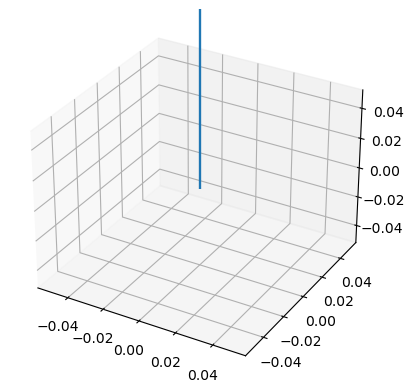

In [ ]:
# Example usage
vectors = [x1, x2]

plot_vectors_3d(vectors)

In [ ]:
import torch

def relu_custom_basis(x, basis_vector):
    """
    ReLU function that zeros out a 3D vector along a specified basis vector.
    
    Arguments:
    x -- input tensor of shape (3,)
    basis_vector -- vector along which to apply the ReLU, specified as a unit vector of shape (3,)
    
    Returns:
    y -- output tensor of shape (3,) with elements of x that are <=0 along the given basis vector set to zero
    """
    # project x onto the basis vector
    projection = torch.dot(x, basis_vector) * basis_vector
    # calculate the component of x orthogonal to the basis vector
    orthogonal = x - projection
    # apply ReLU to the projection along the basis vector
    projection_relu = max(0, torch.dot(projection, basis_vector))
    # combine the projected and orthogonal components
    y = projection_relu * basis_vector + orthogonal
    return y

# example usage with a 3D tensor and basis vector (1, 0, 0)
x = torch.tensor([1, -2, 3])
basis_vector = torch.tensor([0, 0, 0])
y = relu_custom_basis(x, basis_vector)
print(y)

tensor([ 1, -2,  3])
